In [1]:
pwd

'C:\\Users\\jagambhi\\OneDrive - Capgemini\\Desktop\\Python'

Using KNN to classify images of numbers
Take the first two steps to implement a KNN algorithm to classify MNIST images

Introduction
With the help of the k-Nearest Neighbors algorithm, a simple yet powerful algorithm to categorize observations into classes you can recognize digits from textual images.

We will take the first two steps to implement a KNN algorithm to classify MNIST images.

These images are unlike the Captcha checks many websites have in place to make sure you’re not a computer trying to hack into the user accounts.

Let’s see how hard it is to let a computer recognize images of numbers.

Our research goal is to let a computer recognize images of numbers (step one of the data science process).

The data we’ll be working on is the MNIST (Mixed National Institute of Standards and Technology database) image data set. The MNIST data set is one of the most common data sets used in machine learning, as it is easy to implement, yet acts as a solid method for proving out models.

MNIST is a data set of 70,000 handwritten digits numbered 0–9. No two handwritten digits are the same, and some can be very hard to correctly classify.

The human benchmark for classifying MNIST is about 97.5% accuracy, so our goal is to beat that!

Have a look at the images of numbers below. How easy or difficult do you think it is to classify them?

# Retrieving Data
The MNIST images can be found in the data sets package of Scikit-learn and are already normalized for you. This way you won’t need much data preparation (step 3 of the data science process).
### imports digits database

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

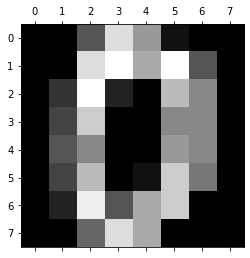

In [3]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

imports ploting library

PyLab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space. Although many examples use PyLab, it is no longer recommended.

In [4]:
import pylab as pl

loads digits

In [5]:
import pylab as pl

# Exploring Data
Working with images isn’t much different from working with other data sets.

In the case of a grey image, you put a value in every matrix entry that depicts the grey value to be shown.

## show the image and data
Turns image into gray-scale values

In [6]:
pl.gray()

<Figure size 432x288 with 0 Axes>

## Shows the first images

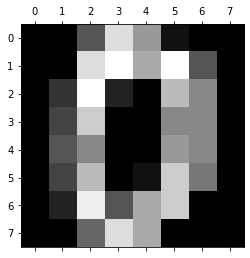

In [7]:
pl.matshow(digits.images[0])
pl.show()

### shows the corresponding matrix

In [8]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# Observe
Observe your output. Do you get the same data matrix?

Here is how a blurry “0” image translate into a data matrix.

# Guess
Let’s have a guess what each number in the matrix means by looking at the blurry image of number ‘0’ above and its corresponding matrix of each pixel.

Which statement do you think would best describe the scale?

The higher the number, the closer it is to white, the lower the number, the closer it is to black.
The higher the number, the closer it is to black, the lower the number, the closer it is to white.

Choice 1 is correct. If you look at the highest number in the matrix (15), you will see that it is white. If you look at the edges of the scale, you will see that they are black.

### Here is the greyscale value for each of the pixels if you are still unclear what each number represents.

## more work ..
The k-nearest neighbours classifier is expecting a list of values, but pl.matshow() returns a two-dimensional array (a matrix) reflecting the shape of the image.

To “flatten” it into a list, we need to call reshape() on digits.images.

In [9]:
digits.images[0].reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Flatten .mp4 file

In [10]:
%%HTML
<video width="80%" controls> 
    <source src="./flatten.mp4" type="video/mp4"> 
</video>

This video explains how reshape() does to “flatten” the two-dimensional array into a one dimensional array.

## Build a KNN model to classify MNIST images
Now that the number of dimensions was reduced from two to one, this brings us to step five of the data science process: model building.

When passing the contents of an image into the classifier, we need to pass it a training data set so that it can start learning how to predict the numbers in the images.

Each image is also labelled with the number it actually shows.

This will build a model in memory of the most likely digit shown in an image given its grayscale values.

Once the program has gone through the training set and built the model, we can then pass it the test set of data to see how well it has learned to interpret the images using the model.

The end result of the following code is called a confusion matrix, a two-dimensional array that shows how often the number predicted was the correct number.

## Load packages

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pylab as plt

## Step 1: Select target variable

In [12]:
y = digits.target

## Step 2: Prepare data
Reshape adapts the matrix form. This method could, for instance, turn a 10x10 matrix into 100 vectors

In [13]:
n_samples = len(digits.images)
n_samples

1797

In [14]:
X = digits.images.reshape((n_samples, -1))
X.shape

(1797, 64)

In [15]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


## Step 3: Split into test set and training set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=0)

## Step 4: Select a k-Nearest Neighbor classifier

In [17]:
clf = KNeighborsClassifier(3)

## Step 5: Fit the data

In [18]:
fit = clf.fit(X_train, y_train)

## Step 6: Predict on unseen data

In [19]:
predicted = fit.predict(X_test)

## Step 7: Create confusion matrix

In [20]:
confusion_matrix(y_test, predicted)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47]], dtype=int64)

Note that: A confusion matrix is used to evaluate the models to ensure reproducibility of analysis. So, if you are not familiar with a confusion matrix, you can read this article here.

The main thing you have to remember here is that the rows are the number of times that number has appeared in the test-set (0 to 9) and the columns are the number of times that number has been predicted. Confusing, right? Hence the name, confusion matrix.

It is shown here that the model predicted the number 2 correctly 17 times (at coordinates 3,3), but also that the model predicted the number 8 15 times when it was actually the number 2 in the image (at coordinates 3,9).

In a good model, you’d expect the sum of the numbers on the main diagonal of the matrix (also known as the matrix trace) to be very high compared to the sum of all matrix entries.

So, from this confusion matrix, we can deduce that for most images, the predictions are quite accurate.

## Visualize the prediction

### stores number image matrix and its prediction (as number) together in array

In [21]:
images_and_predictions = list(zip(digits.images, fit.predict(X)))

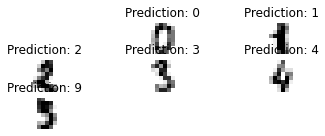

In [22]:
for index, (image, prediction) in enumerate(images_and_predictions[:6]):
    plt.subplot(6,3,index+5)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

The bottom left number is ambiguous, even to humans; is it a 5 or a 9? It’s debatable, but the algorithm thinks it’s a 9.

By discerning which images were misinterpreted, we can train the model further by

labelling them with the correct number they display and feeding them back into the model as a new training set (step 5 of the data science process).

This will make the model more accurate, so the cycle of learn, predict, correct continues and the predictions become more accurate.